In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('googleplaystore.csv', index_col='App')
orig_df = pd.read_csv('googleplaystore.csv', index_col='App')

In [3]:
df.shape

(10841, 12)

In [4]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.head(4)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


,Total,Percent
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Content Rating,1,0.009224
Type,1,0.009224


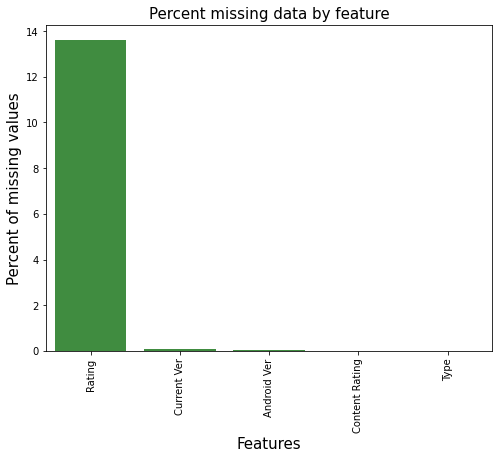

In [6]:
# Graph that shows missing data

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(df)

In [7]:
# Cleaning/trimming the data

print(df.columns)
drop_cols = ['Last Updated', 'Current Ver']
df.drop(columns=drop_cols, axis=1, inplace=True)

df.dropna(subset=["Rating"], axis=0, inplace=True)

df.head(4)

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up


In [8]:
# Removing any problematic rows

print(df.shape)

df.drop(df[df.isnull().any(axis=1)].index, inplace=True)

print(df.count())

(9367, 10)
Category          9364
Rating            9364
Reviews           9364
Size              9364
Installs          9364
Type              9364
Price             9364
Content Rating    9364
Genres            9364
Android Ver       9364
dtype: int64


In [9]:
print(df.dtypes)

Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Android Ver        object
dtype: object


In [10]:
# Converting the data types

df['Reviews'] = df['Reviews'].astype(int)

def size_to_int(s):
    if s == 'Varies with device':
        s = '11M'
    if s[-1:] == 'M':
        s = float(s[:-1])
        s = s * (10**6)
    elif s[-1:] == 'k':
        s = float(s[:-1])
        s = s * (10**3)
    return int(s)
df['Size'] = df['Size'].map(size_to_int)

def installs_to_int(ins):
    ins = ins.replace(',', '')
    ins = ins.replace('+', '')
    return int(ins)
df['Installs'] = df['Installs'].map(installs_to_int)

def price_to_float(p):
    if p[0:1] == '$':
        p = p[1:]
    return float(p)
df['Price'] = df['Price'].map(price_to_float)



print(df.dtypes)

Category           object
Rating            float64
Reviews             int32
Size                int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Android Ver        object
dtype: object


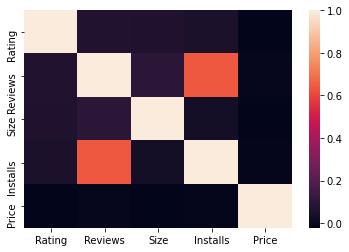

In [11]:
# Displaying correlations

sns.heatmap(df.corr(), fmt = ".4f")

In [12]:
# Transforming the data using one hot encoding

dummy_columns = []
skip = []
for col in df.columns:
    if not isinstance(df[col][0], (int, float, np.integer, np.float)) and not (col in skip):
        dummy_columns.append(col)

df = pd.get_dummies(df, columns=dummy_columns)
df.shape

(9364, 192)

In [13]:
# Splitting data into training/testing subparts

from sklearn.model_selection import train_test_split

X = df.drop('Rating', axis=1)
y = df['Rating']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=5, test_size=0.3)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_val, val_pred):
    print('Mean Squared Error:', round(mean_squared_error(y_val, val_pred), 5))
    print('Coefficient of Determination (R^2):', round(r2_score(y_val, val_pred), 5))
    print('Mean Absolute Error:', round(mean_absolute_error(y_val, val_pred), 5))

In [20]:
# Using the mean (baseline)

mean = y_train.mean()
val_pred = []
for i in range(y_val.shape[0]):
    val_pred.append(mean)
    
val_pred = pd.Series(val_pred)
val_pred.index = y_val.index
    
evaluate_model(y_val, val_pred)

Mean Squared Error: 0.27054
Coefficient of Determination (R^2): -3e-05
Mean Absolute Error: 0.36085


In [21]:
# Linear Regression

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

val_pred = linreg.predict(X_val)

evaluate_model(y_val, val_pred)

Mean Squared Error: 0.26221
Coefficient of Determination (R^2): 0.03077
Mean Absolute Error: 0.35573


In [23]:
# Random Forest Regressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(5, 10),
            'n_estimators': (10, 50, 100, 500, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"])
rfr.fit(X_train, y_train)
    
val_pred = rfr.predict(X_val)
    
evaluate_model(y_val, val_pred)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.0min finished


{'max_depth': 9, 'n_estimators': 1000}
Mean Squared Error: 0.23666
Coefficient of Determination (R^2): 0.1252
Mean Absolute Error: 0.32294


In [25]:
import pickle
filename = 'rfr_model.sav'
pickle.dump(rfr, open(filename, 'wb'))